<a href="https://colab.research.google.com/github/sauravsingla/General/blob/master/Road_Accidents_UK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import TimeSeriesSplit
plt.style.use('ggplot')
%config InlineBackend.figure_format = 'retina'

import warnings
warnings.filterwarnings('ignore')

In [ ]:
accidents = pd.read_csv('dftRoadSafety_Accidents_2016.csv',index_col='Accident_Index')
casualties=pd.read_csv('Cas.csv' , error_bad_lines=False,index_col='Accident_Index',warn_bad_lines=False)
vehicles=pd.read_csv('Veh.csv', error_bad_lines=False,index_col='Accident_Index',warn_bad_lines=False)

In [ ]:
accidents.head()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
Accident_Index,,,,,,,,,,,,,,,,,,,,,
2016010000005,519310.0,188730.0,-0.279323,51.584754,1,3,2,1,01/11/2016,3,...,0,0,5,1,1,0,0,1,1,E01000543
2016010000006,551920.0,174560.0,0.184928,51.449595,1,3,1,1,01/11/2016,3,...,0,0,4,1,1,0,0,1,1,E01000375
2016010000008,505930.0,183850.0,-0.473837,51.543563,1,3,1,1,01/11/2016,3,...,0,0,4,1,1,0,0,1,1,E01033725
2016010000016,527770.0,168930.0,-0.164442,51.404958,1,3,1,1,01/11/2016,3,...,0,0,1,1,1,0,0,1,1,E01003379
2016010000018,510740.0,177230.0,-0.406580,51.483139,1,3,2,1,01/11/2016,3,...,0,0,1,1,1,0,0,1,1,E01002583


In [ ]:
accidents.columns

Index(['Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude',
       'Latitude', 'Police_Force', 'Accident_Severity', 'Number_of_Vehicles',
       'Number_of_Casualties', 'Date', 'Day_of_Week', 'Time',
       'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location'],
      dtype='object')

In [ ]:
# missing column function
def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")

        return mz_table

missing_zero_values_table(accidents)

Your selected dataframe has 31 columns and 136621 Rows.
There are 7 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
LSOA_of_Accident_Location,0,8351,6.1,8351,6.1,object
Speed_limit,0,37,0.0,37,0.0,float64
Location_Easting_OSGR,0,7,0.0,7,0.0,float64
Location_Northing_OSGR,0,7,0.0,7,0.0,float64
Longitude,0,7,0.0,7,0.0,float64
Latitude,0,7,0.0,7,0.0,float64
Time,0,2,0.0,2,0.0,object


In [ ]:
accidents.info()

<class 'pandas.core.frame.DataFrame'>
Index: 136621 entries, 2016010000005 to 2016984133416
Data columns (total 31 columns):
Location_Easting_OSGR                          136614 non-null float64
Location_Northing_OSGR                         136614 non-null float64
Longitude                                      136614 non-null float64
Latitude                                       136614 non-null float64
Police_Force                                   136621 non-null int64
Accident_Severity                              136621 non-null int64
Number_of_Vehicles                             136621 non-null int64
Number_of_Casualties                           136621 non-null int64
Date                                           136621 non-null object
Day_of_Week                                    136621 non-null int64
Time                                           136619 non-null object
Local_Authority_(District)                     136621 non-null int64
Local_Authority_(Highway)            

In [ ]:
accidents = accidents.join(vehicles, how='outer')

In [ ]:
accidents.drop(['Location_Easting_OSGR', 'Location_Northing_OSGR','LSOA_of_Accident_Location',
                'Junction_Control' ,'2nd_Road_Class'], axis=1, inplace=True)
accidents['Date_time'] =  accidents['Date'] +' '+ accidents['Time']

for col in accidents.columns:
    accidents = (accidents[accidents[col]!=-1])
    #print(col ,' ' , x)
for col in casualties.columns:
    casualties = (casualties[casualties[col]!=-1])

    accidents['Date_time'] = pd.to_datetime(accidents.Date_time)
accidents.dropna(inplace=True)

In [ ]:
accidents.columns

Index(['Longitude', 'Latitude', 'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Detail', '2nd_Road_Number',
       'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'Vehicle_Reference', 'Vehicle_Type', 'Towing_and_Articulation',
       'Vehicle_Manoeuvre', 'Vehicle_Location-Restricted_Lane',
       'Junction_Location', 'Skidding_and_Overturning',
       'Hit_Object_in_Carriageway', 'Vehicle_Leaving_Carriageway',
       'Hit_Object_off_Carriageway', '1st_Point_of_Impact',
       'Was_Vehicle_Left_Hand_Drive?', 

**Male drivers are contrbuting approximately 66% of the accidents in the UK**

In [ ]:
df_Driver_Sex_Male= accidents[accidents.Sex_of_Driver == 1]
df_Driver_Sex_Female= accidents[accidents.Sex_of_Driver == 2]

Male_Accident=len(df_Driver_Sex_Male)
Female_Accident=len(df_Driver_Sex_Female)
total_Accident=len(accidents)

per_Male_Accident=(Male_Accident/total_Accident)*100
per_Female_Accident=(Female_Accident/total_Accident)*100

print('Male_Accident=',format(round(per_Male_Accident,1)),'%')
print('Female_Accident=',format(round(per_Female_Accident,1)),'%')

Male_Accident= 66.5 %
Female_Accident= 33.3 %


**Daylight most of the accidents happen**

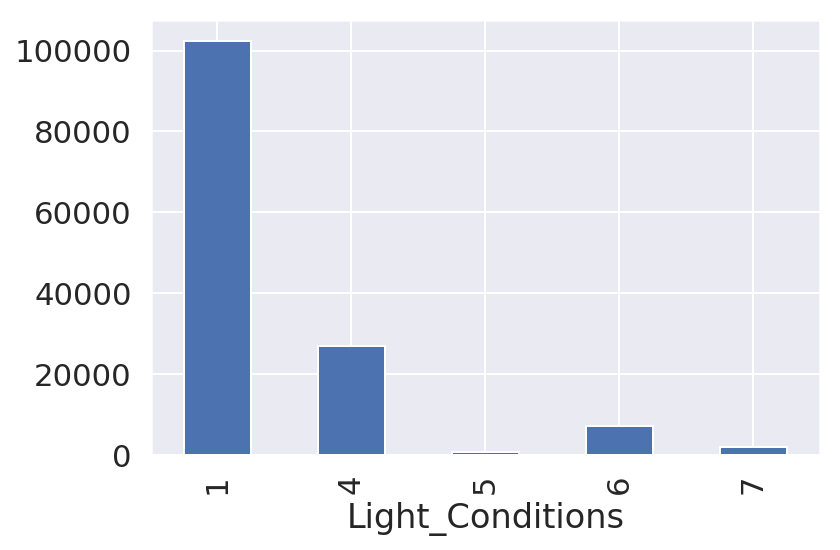

In [ ]:
accidents.groupby(accidents.Light_Conditions).Accident_Severity.count().plot(kind = 'bar')

**In dry condition most of the accidents happen**

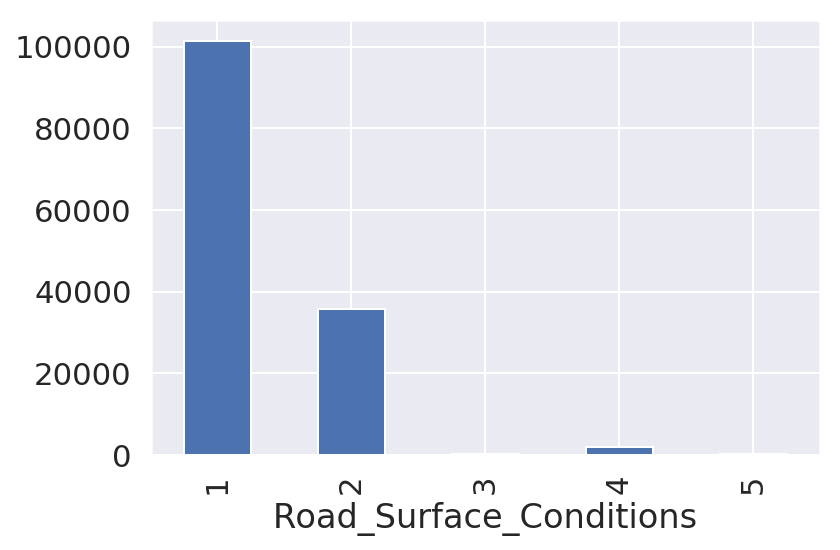

In [ ]:
accidents.groupby(accidents.Road_Surface_Conditions).Accident_Severity.count().plot(kind = 'bar')

**When weather is dry with no winds is the main cause of the accidents in the UK**

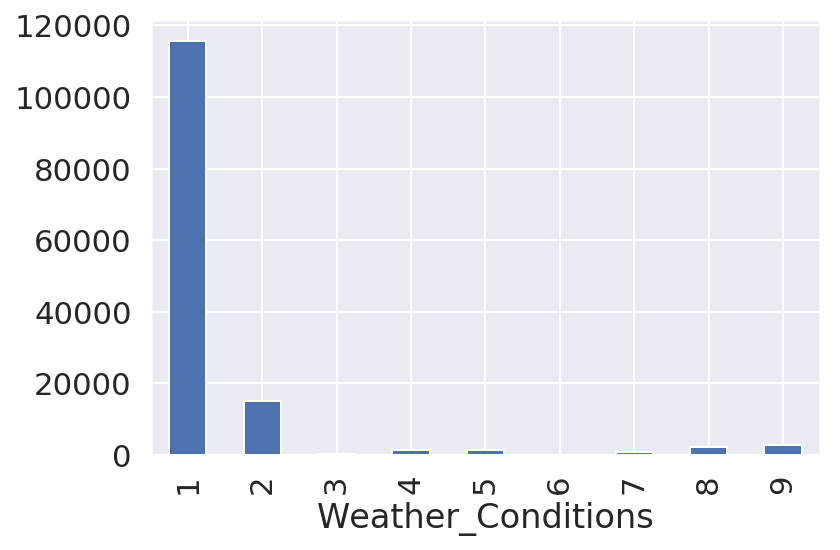

In [ ]:
accidents.groupby(accidents.Weather_Conditions).Accident_Severity.count().plot(kind = 'bar')

**Vehicle type no 9 is having maximum number of accidents**

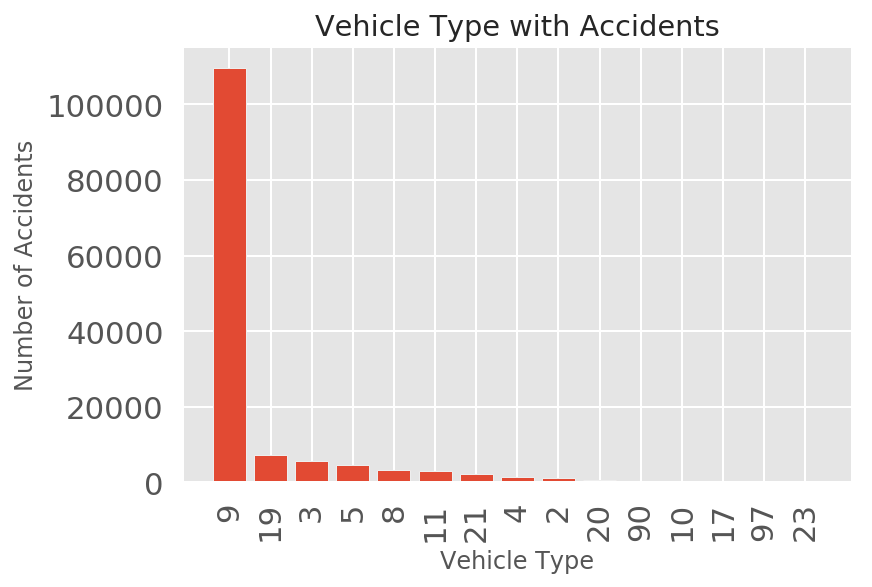

In [ ]:
Vehicle_Type = accidents.Vehicle_Type
Vehicle_counts = Counter(Vehicle_Type)

common = Vehicle_counts.most_common()
labels = [item[0] for item in common]
number = [item[1] for item in common]
nbars = len(common)
plt.xticks(rotation=90)
plt.title('Vehicle Type with Accidents')
_=plt.ylabel('Number of Accidents')
_=plt.xlabel('Vehicle Type')
plt.bar(np.arange(nbars), number, tick_label=labels)
plt.show()

**Severity type no 3 is the maximum in the UK**

Counter({3: 116797, 2: 20959, 1: 1719})
[3, 2, 1]


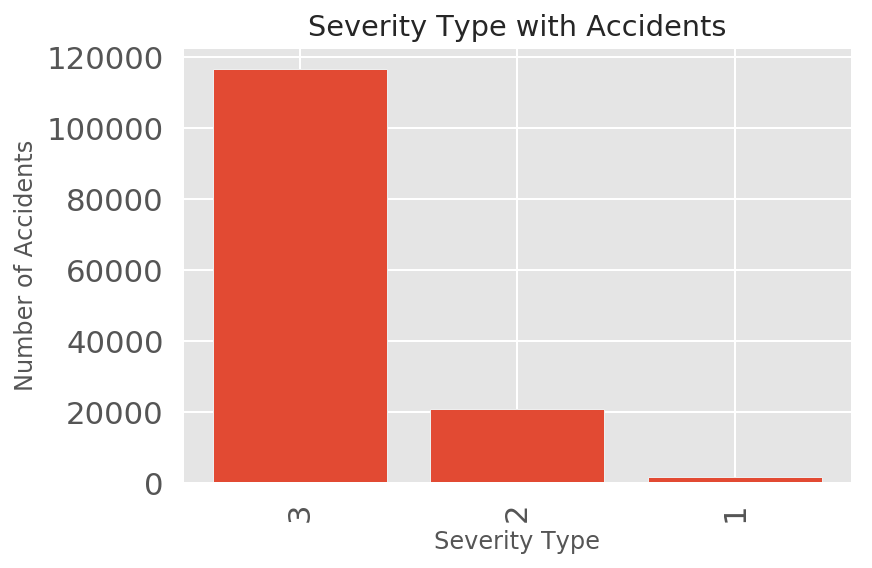

In [ ]:
Severity_Type = accidents.Accident_Severity
Severity_counts = Counter(Severity_Type)

print(Severity_counts)

common = Severity_counts.most_common()
labels = [item[0] for item in common]
number = [item[1] for item in common]

print(labels)

nbars = len(common)

plt.xticks(rotation=90)
plt.title('Severity Type with Accidents')
_=plt.ylabel('Number of Accidents')
_=plt.xlabel('Severity Type')
plt.bar(np.arange(nbars), number, tick_label=labels)
plt.show()

**Driver age between 25 to 35 are contributing to most of the accidents in the UK**

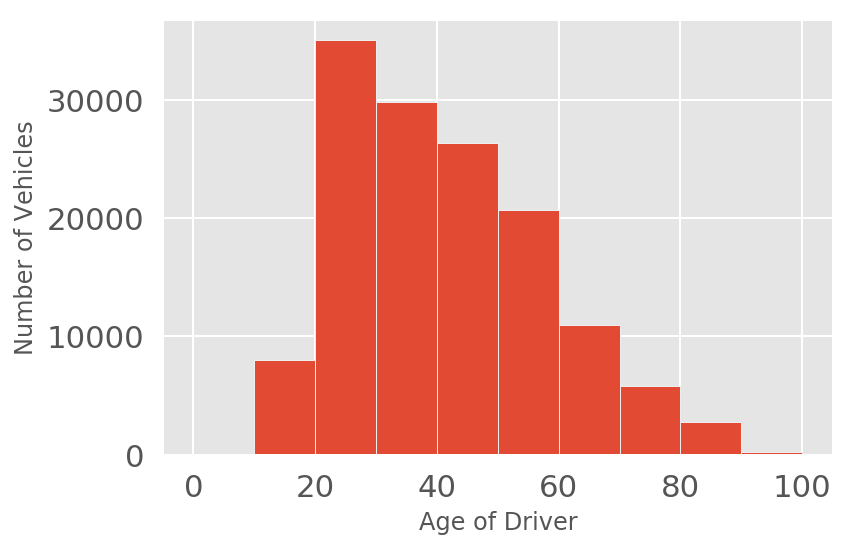

In [ ]:
bin_edges= [0,10,20,30,40,50,60,70,80,90,100]
_=plt.hist(accidents['Age_of_Driver'], bins = bin_edges)
_=plt.xlabel('Age of Driver')
_=plt.ylabel('Number of Vehicles')
plt.show()

**Speed zone 30 is having maximum number of slight injury severity and speed zone 60 is having maximum number of critical injury severity**

<Figure size 1440x360 with 0 Axes>

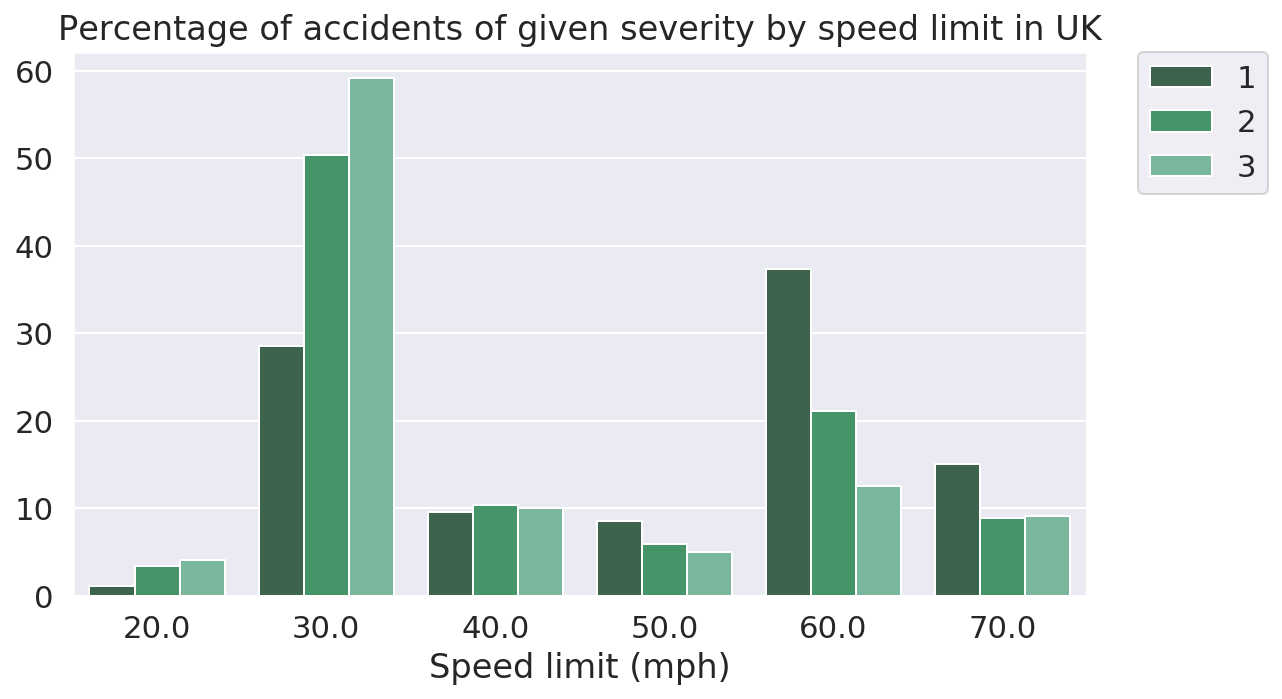

In [ ]:
# accident severity and speed limit in UK
grp_uk = accidents.groupby(["Speed_limit", "Accident_Severity"])
grp_uk = grp_uk.size().reset_index(name='counts')

# define function to calculate rates
def rates(x):
    rate = 100*x["counts"] / x["counts"].sum()
    return rate

uk_barplot = grp_uk.groupby("Accident_Severity").apply(rates).reset_index()
uk_barplot["level_1"] = list(grp_uk["Speed_limit"][uk_barplot["level_1"]])
uk_barplot = uk_barplot.rename(index=str, columns={"level_1": "Speed_limit"})

sns.set(font_scale=1.4)
plt.figure(figsize=(20, 5))

sns.set(font_scale=1.4)
plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)
bplot = sns.barplot(x = "Speed_limit", y = "counts", hue = "Accident_Severity", palette="BuGn_d", 
                    data = uk_barplot)
bplot.set_title("Percentage of accidents of given severity by speed limit in UK")
bplot.set_xlabel("Speed limit (mph)")
bplot.set_ylabel("")
bplot.legend_.remove()

# Put the legend out of the figure
bplt = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

**As we can see that thursday has the highest amount of accidents in this dataset . We have to keep in mind that accidents numbers could be depending on traffic amount on particular day.**

Text(0.5, 0, '0 - Sunday ,  1 - Monday  ,2 - Tuesday , 3 - Wednesday , 4 - Thursday , 5 - Friday , 6 - Saturday')

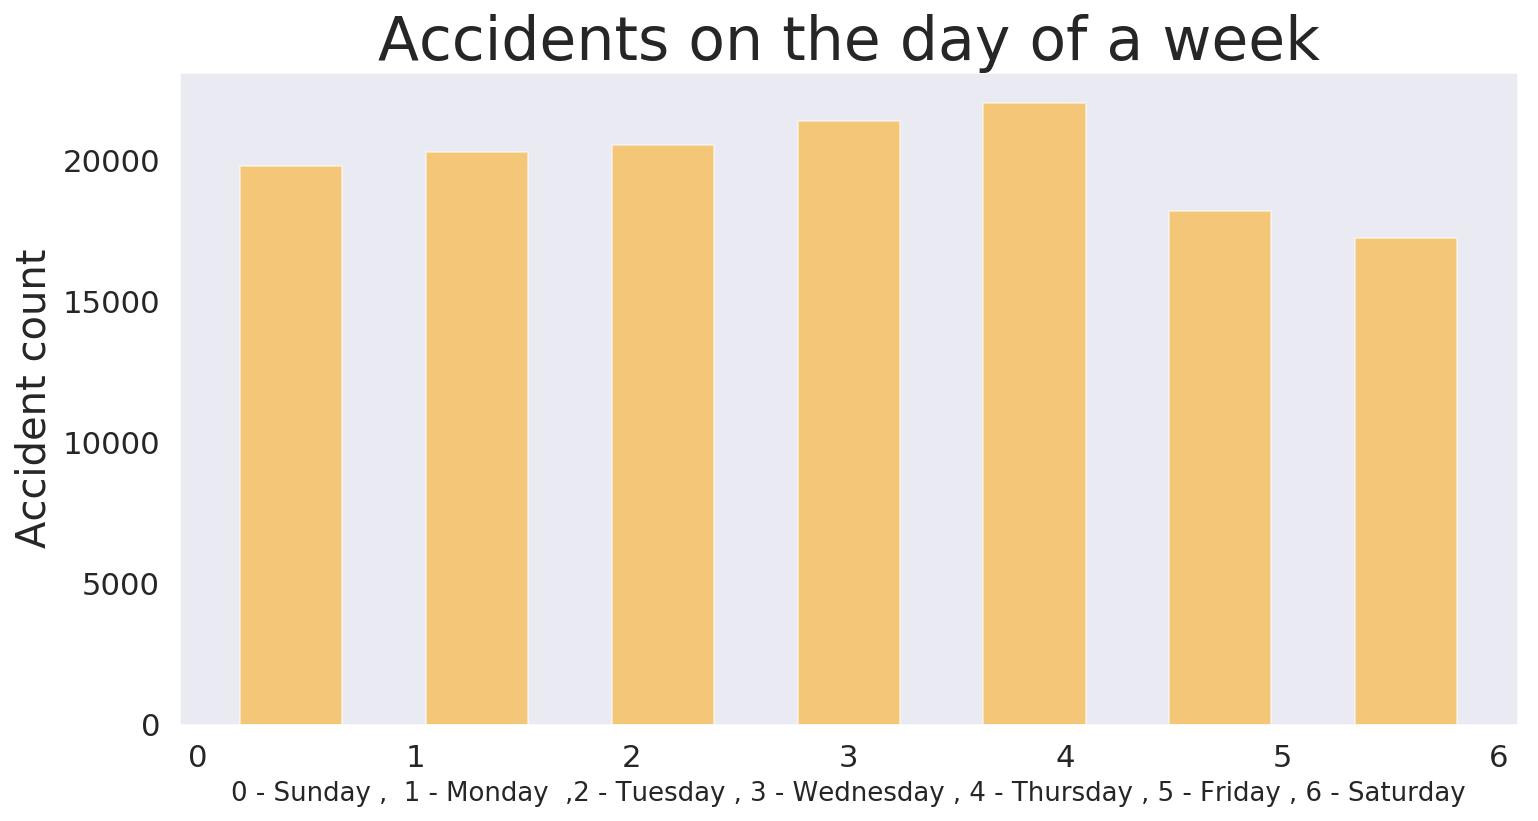

In [ ]:
plt.figure(figsize=(12,6))
accidents.Date_time.dt.dayofweek.hist(bins=7,rwidth=0.55,alpha=0.5, color= 'orange')
plt.title('Accidents on the day of a week' , fontsize= 30)
plt.grid(False)
plt.ylabel('Accident count' , fontsize = 20)
plt.xlabel('0 - Sunday ,  1 - Monday  ,2 - Tuesday , 3 - Wednesday , 4 - Thursday , 5 - Friday , 6 - Saturday' , fontsize = 13)

**We found out that the most of accidents happened around after noon. We can assume that this time of the day has the most traffic moving such as people leaving from work.**

Text(0, 0.5, 'Accident count')

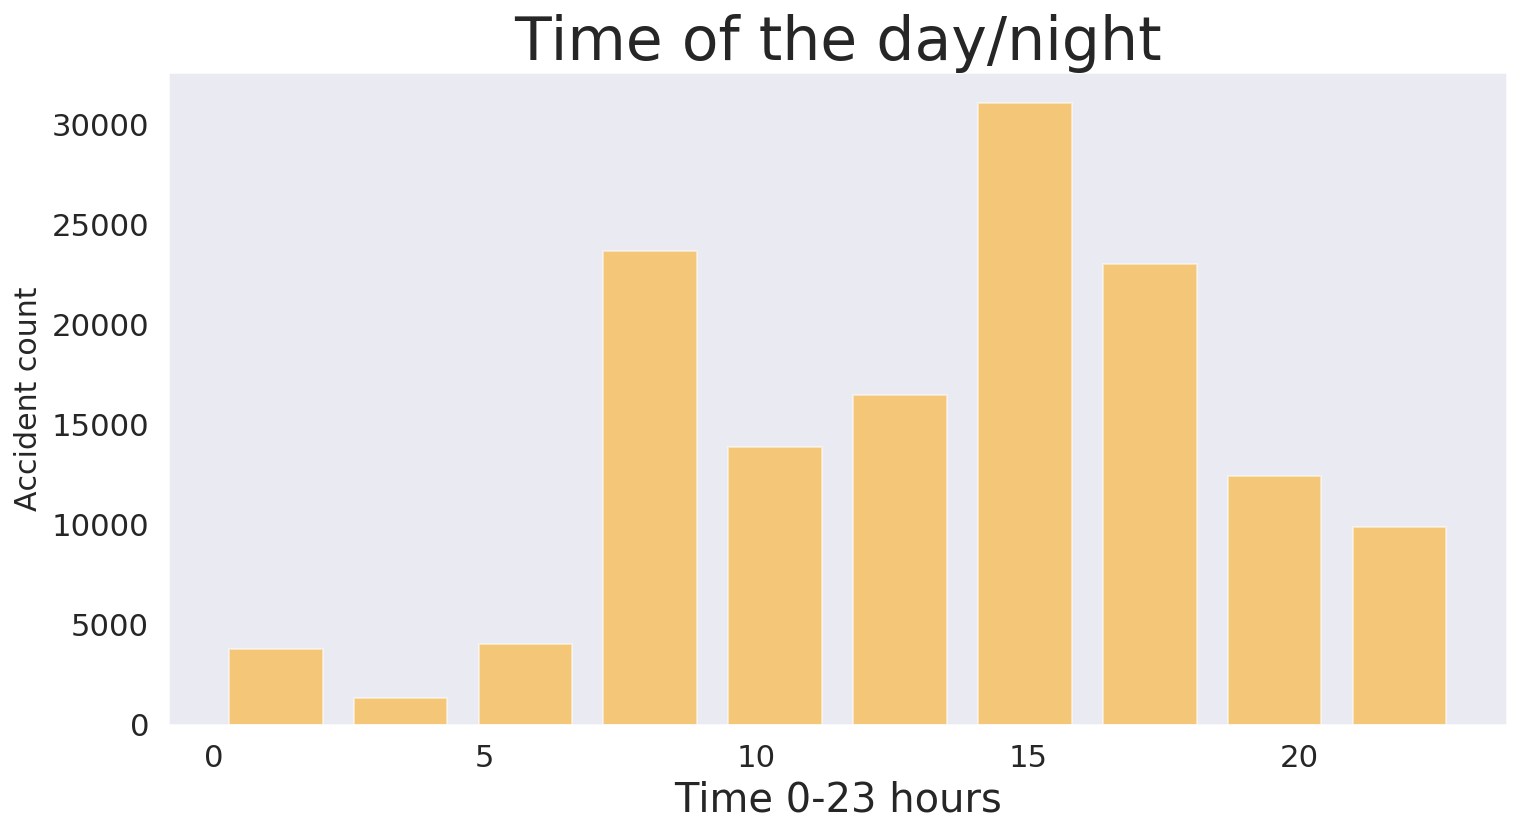

In [ ]:
plt.figure(figsize=(12,6))
accidents.Date_time.dt.hour.hist(rwidth=0.75,alpha =0.50, color= 'orange')
plt.title('Time of the day/night',fontsize= 30)
plt.grid(False)
plt.xlabel('Time 0-23 hours' , fontsize = 20)
plt.ylabel('Accident count' , fontsize = 15)

**This is very interesting fact about this dataset. Most of the drivers age is around 25 to 35 who are involved in the accident. However, we do not know the number of drivers with age 25 to 35 on the road compare to other ages. Intutively, I would assume that the driver with age 25 to 35 are more in the number of drivers with different age.**

Text(0.5, 0, 'Age of Drivers')

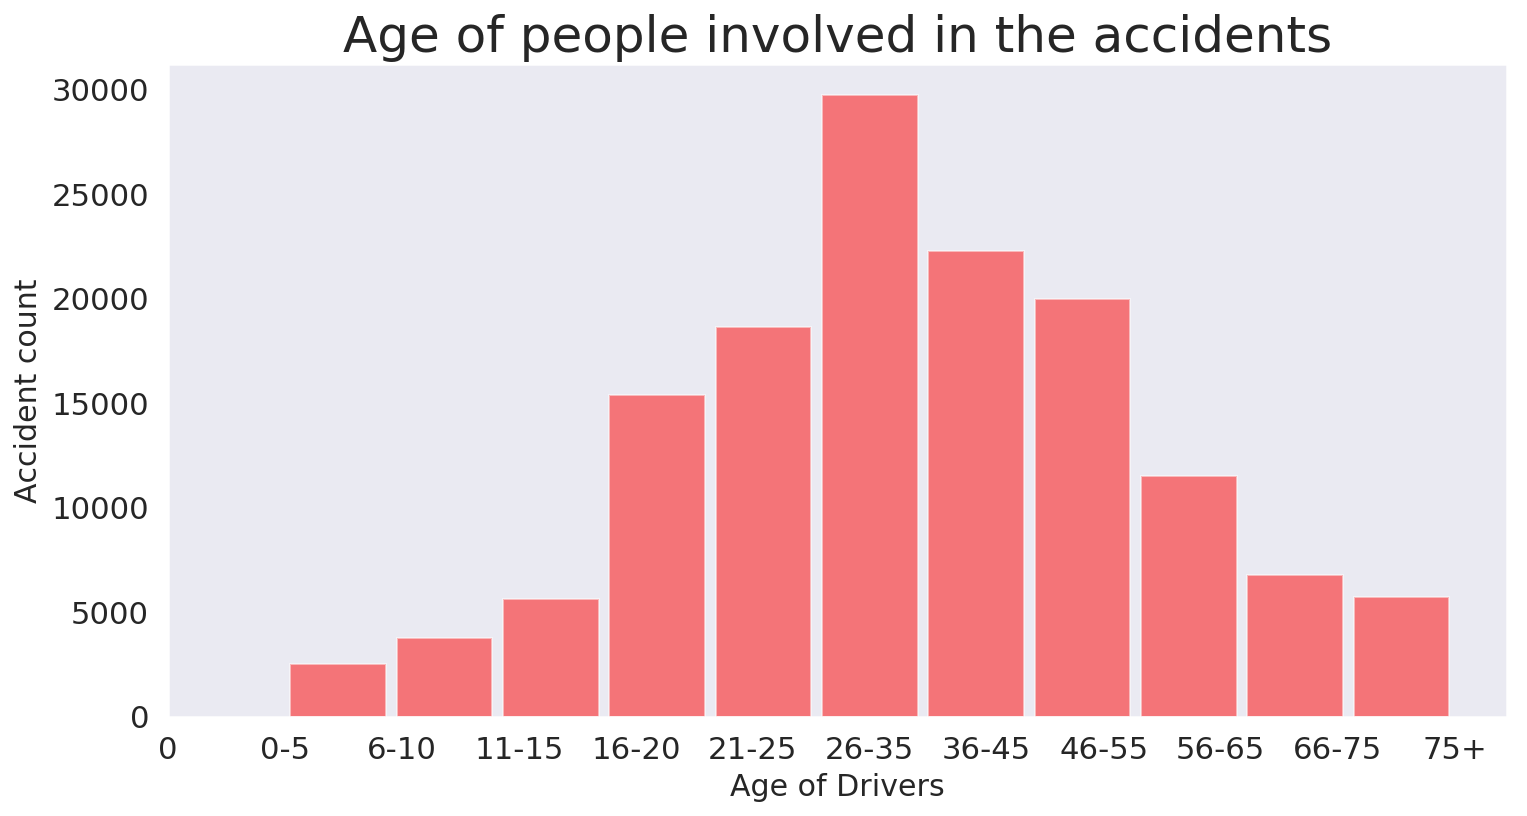

In [ ]:
objects = ['0','0-5','6-10','11-15','16-20','21-25','26-35',
          '36-45', '46-55','56-65','66-75','75+']

plt.figure(figsize=(12,6))
casualties.Age_Band_of_Casualty.hist(bins = 11,alpha=0.5,rwidth=0.90, color= 'red',)
plt.title('Age of people involved in the accidents', fontsize = 25)
plt.grid(False)
y_pos = np.arange(len(objects))
plt.xticks(y_pos , objects)
plt.ylabel('Accident count' , fontsize = 15)
plt.xlabel('Age of Drivers', fontsize = 15,)

**Most of the accidents occured on the road where the speed limit is 30. I was expecting more accidents on highway or major roadways. Some of the accidents could be cause of stop sign, changing lanes or turning into parking lot etc.**

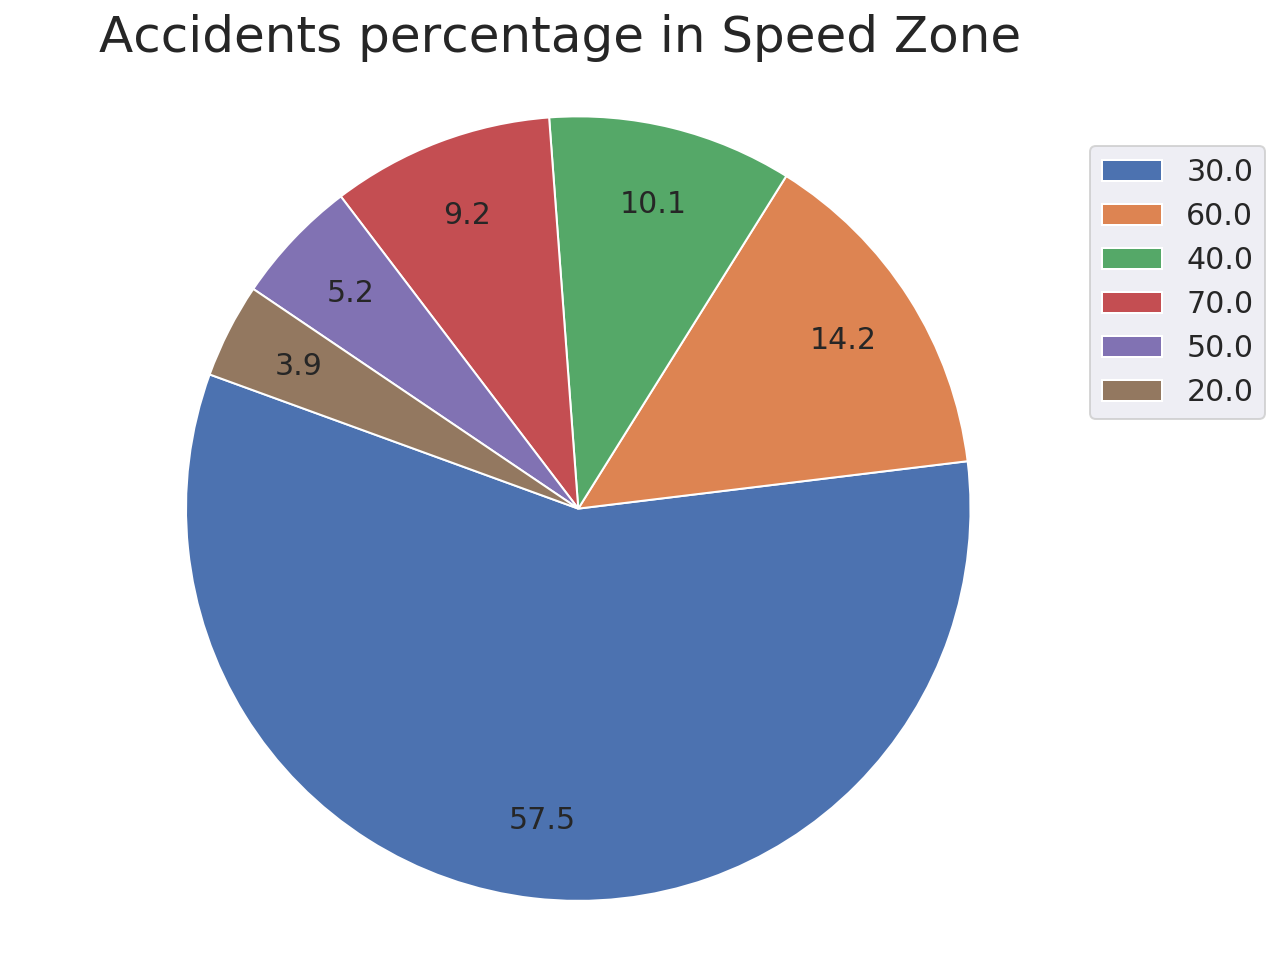

In [ ]:
speed_zone_accidents = accidents.loc[accidents['Speed_limit'].isin(['20' ,'30' ,'40' ,'50' ,'60' ,'70'])]
speed  = speed_zone_accidents.Speed_limit.value_counts()

explode = (0.0, 0.0, 0.0 , 0.0 ,0.0,0.0) 
plt.figure(figsize=(10,8))
plt.pie(speed.values,  labels=None, 
        autopct='%.1f',pctdistance=0.8, labeldistance=1.9 ,explode = explode, shadow=False, startangle=160,textprops={'fontsize': 15})
 
plt.axis('equal')
plt.legend(speed.index, bbox_to_anchor=(1,0.7), loc="center right", fontsize=15, 
           bbox_transform=plt.gcf().transFigure)
plt.figtext(.5,.9,'Accidents percentage in Speed Zone', fontsize=25, ha='center')
plt.show()

**As we see that there is not so much strong correlations between any variables. I was expecting weather condition to be strong correlation with any of the variable. There is only one postiive strong correlation between speed limit and Urban or Rural Area.**

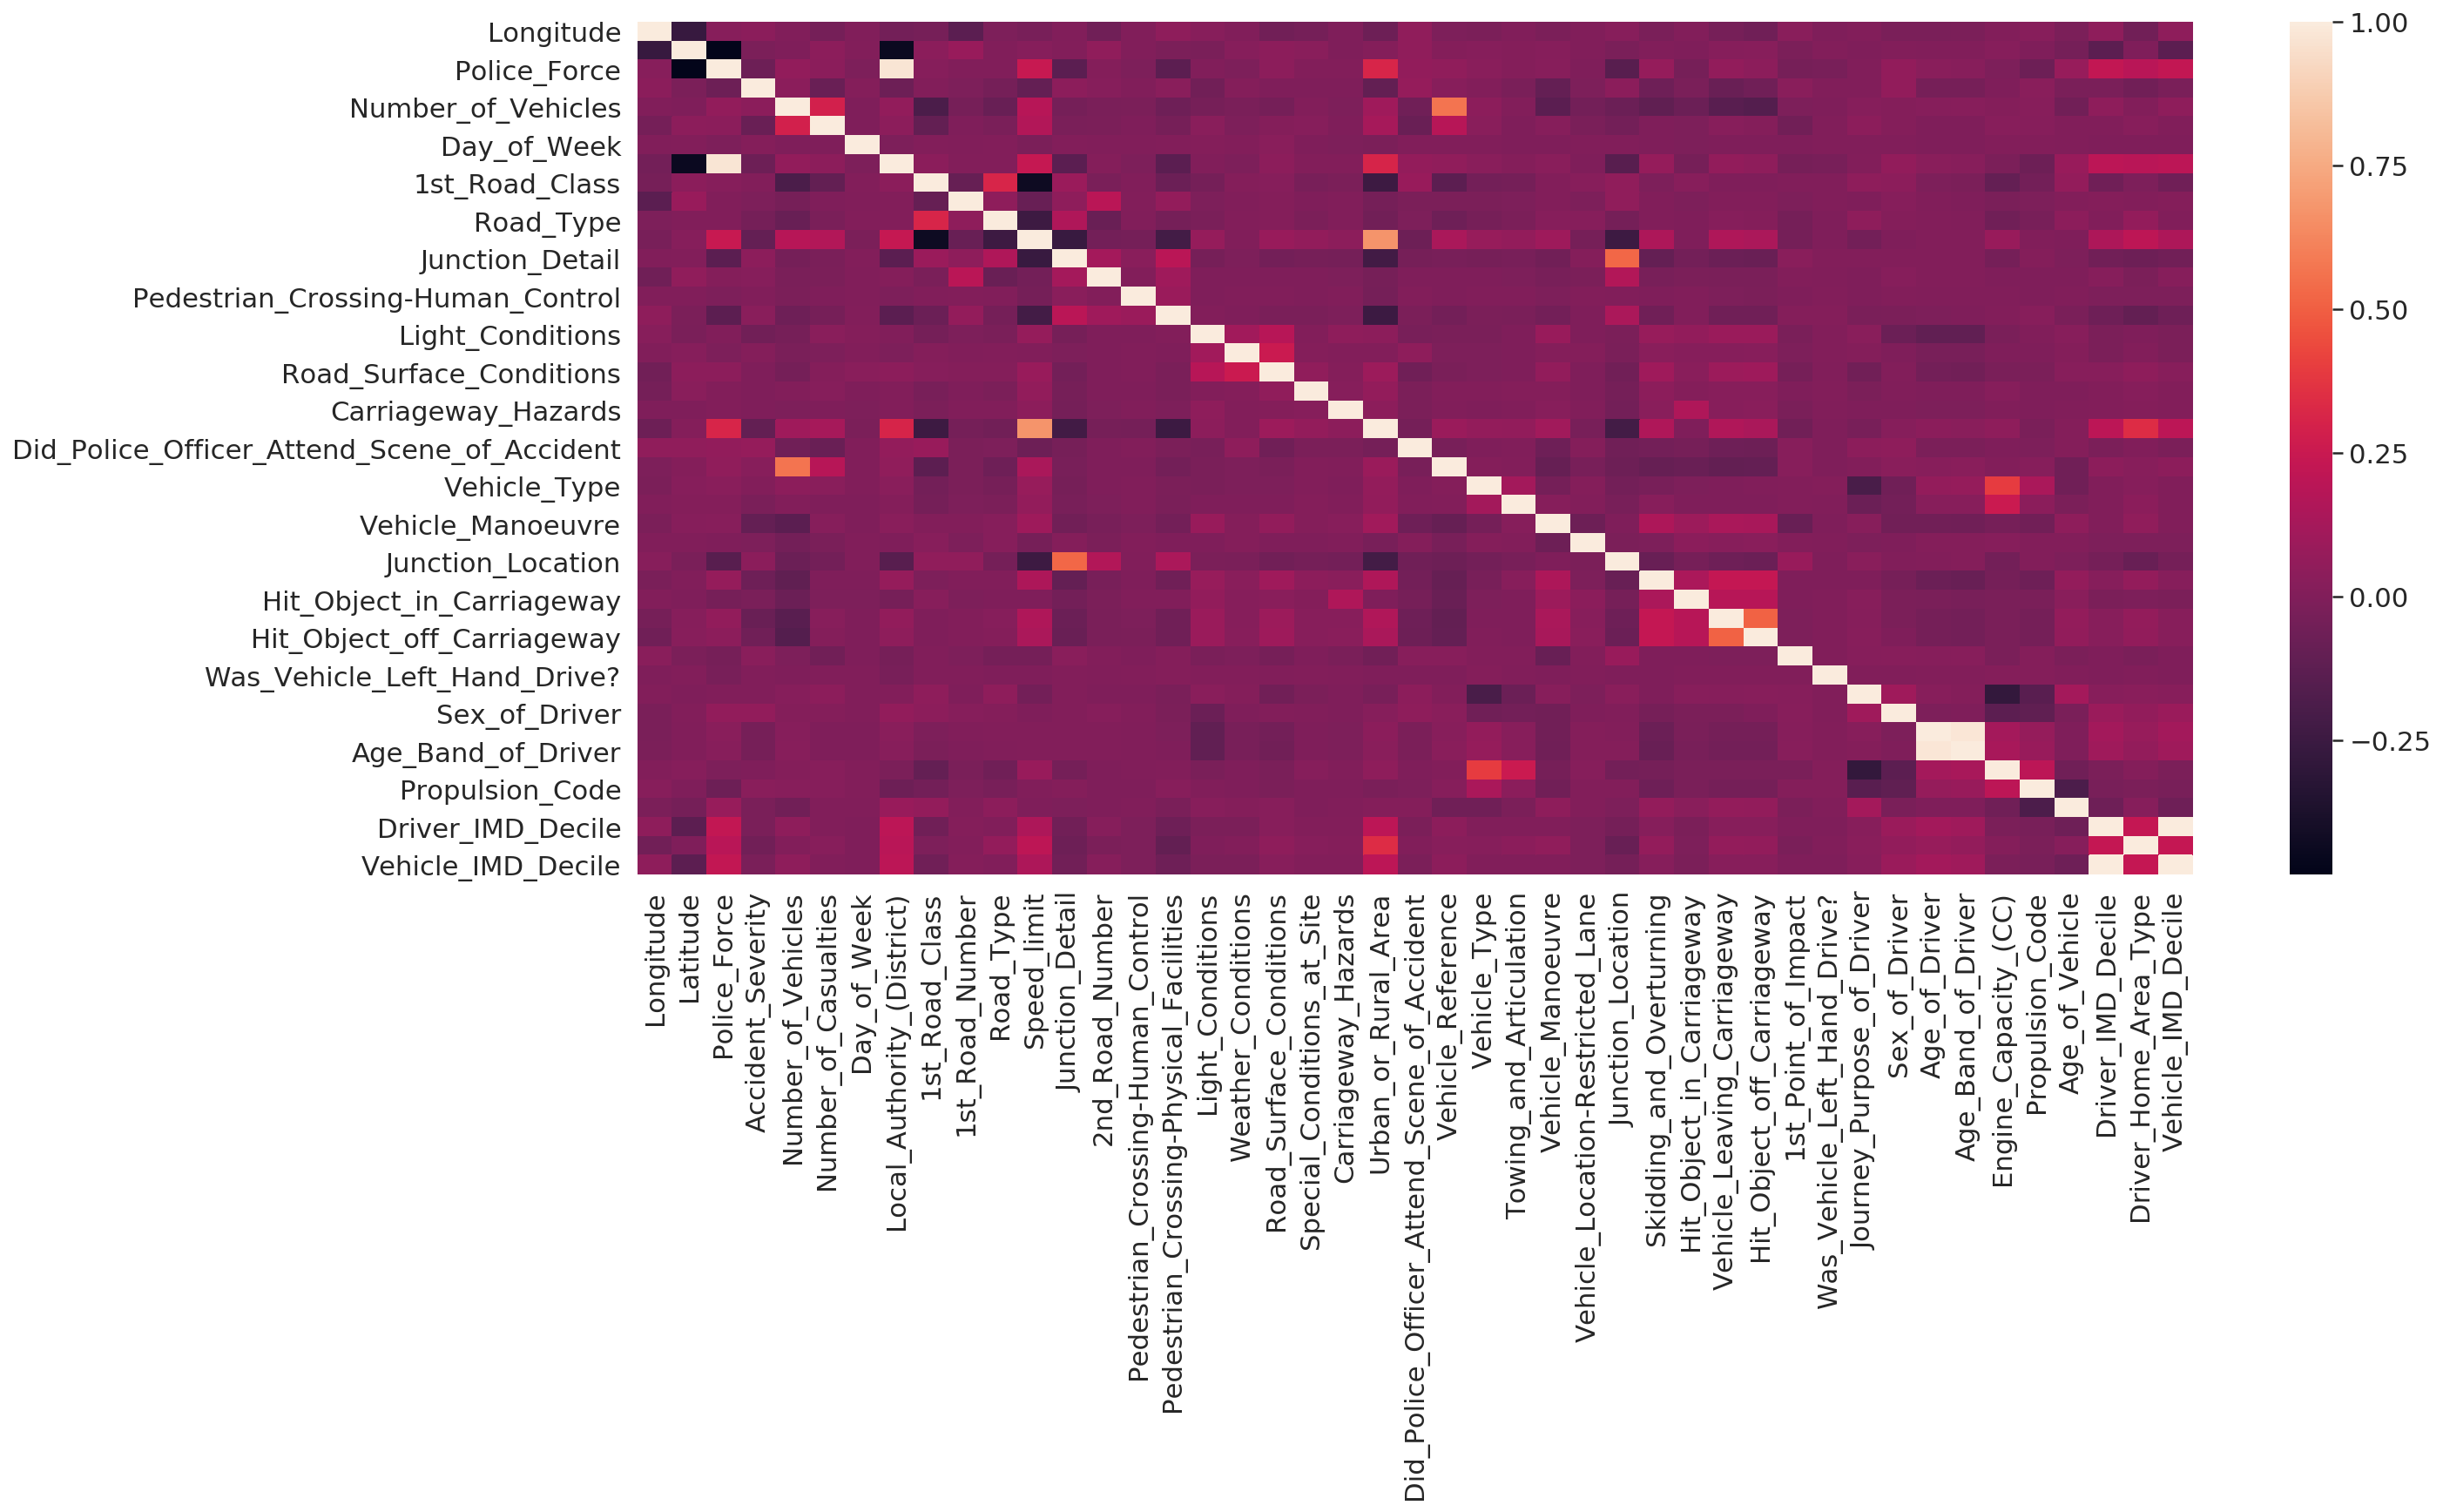

In [ ]:
corr =  accidents.corr()
plt.subplots(figsize=(20,9))
sns.heatmap(corr)

** Age of driver is from 18 to 88 in the dataset and  the age of vehicle is also from 0 to 30**

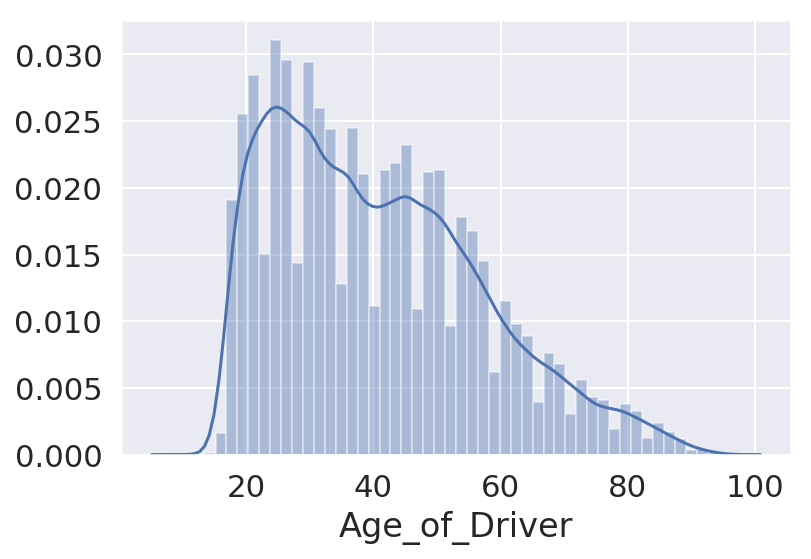

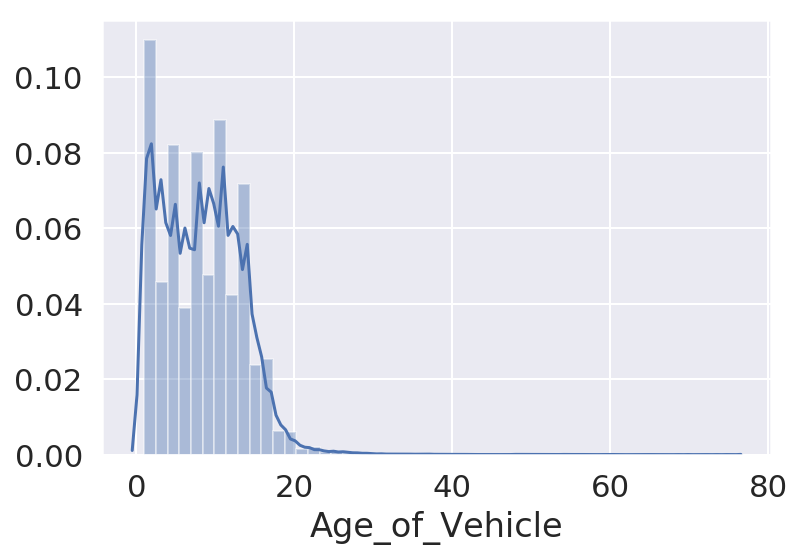

<Figure size 432x288 with 0 Axes>

In [ ]:
sns.distplot(accidents['Age_of_Driver']);
fig = plt.figure()
sns.distplot(accidents['Age_of_Vehicle']);
fig = plt.figure()

**Normalising Value**

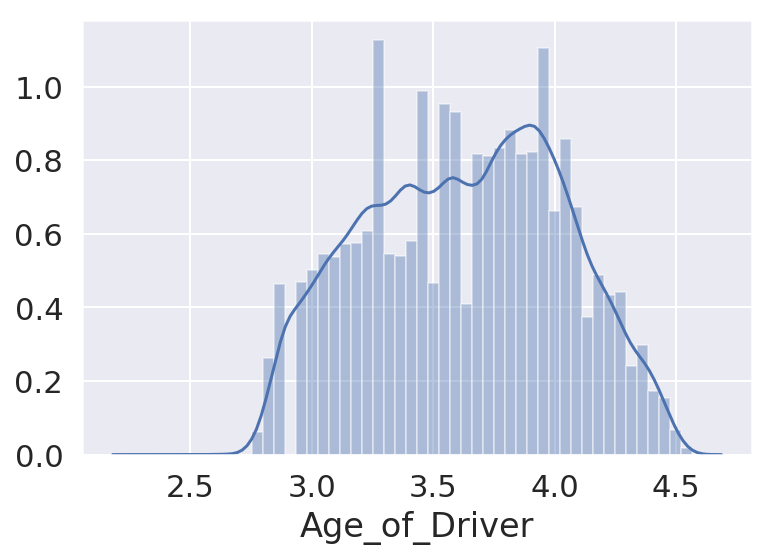

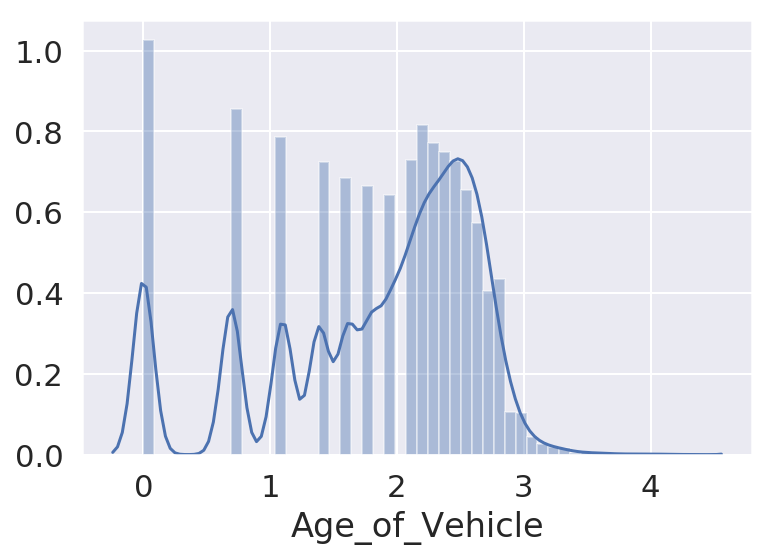

<Figure size 432x288 with 0 Axes>

In [ ]:
accidents['Age_of_Driver'] = np.log(accidents['Age_of_Driver'])
accidents['Age_of_Vehicle'] = np.log(accidents['Age_of_Vehicle'])
sns.distplot(accidents['Age_of_Driver']);
fig = plt.figure()
sns.distplot(accidents['Age_of_Vehicle']);
fig = plt.figure()

**Spliting the data into training data and test data**

In [ ]:
from sklearn.model_selection import train_test_split

accident_ml = accidents.drop('Accident_Severity' ,axis=1)
accident_ml = accident_ml[['Did_Police_Officer_Attend_Scene_of_Accident' , 'Age_of_Driver' ,'Vehicle_Type', 'Age_of_Vehicle','Engine_Capacity_(CC)','Day_of_Week' , 'Weather_Conditions' , 'Road_Surface_Conditions'
                          , 'Light_Conditions', 'Sex_of_Driver' ,'Speed_limit']]

# Split the data into a training and test set.
X_train, X_test, y_train, y_test = train_test_split(accident_ml.values, 
                                              accidents['Accident_Severity'].values,test_size=0.20, random_state=99)

**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

random_forest = RandomForestClassifier(n_estimators=200)

# Fit the model on the trainng data.
random_forest.fit(X_train,y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_test, y_test)
acc_random_forest1 = round(random_forest.score(X_test, y_test) * 100, 2)

sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=Y_pred)

print("Accuracy" , acc_random_forest1)
print(sk_report)

# Confusion Matrix 
pd.crosstab(y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Accuracy 82.81
              precision    recall  f1-score   support

           1   0.117647  0.005831  0.011111       343
           2   0.324750  0.053715  0.092183      4226
           3   0.841532  0.980537  0.905732     23326

   micro avg   0.828141  0.828141  0.828141     27895
   macro avg   0.427976  0.346694  0.336342     27895
weighted avg   0.754340  0.828141  0.771482     27895



Predicted,1,2,3,All
Actual,,,,
1,2,30,311,343
2,3,227,3996,4226
3,12,442,22872,23326
All,17,699,27179,27895


**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression()

# Fit the model on the trainng data.
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=y_pred)

print("Accuracy", round(accuracy_score(y_pred, y_test)*100,2))
print(sk_report)

# Confusion Matrix 
pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Accuracy 83.62
              precision    recall  f1-score   support

           1   0.000000  0.000000  0.000000       343
           2   0.000000  0.000000  0.000000      4226
           3   0.836207  1.000000  0.910798     23326

   micro avg   0.836207  0.836207  0.836207     27895
   macro avg   0.278736  0.333333  0.303599     27895
weighted avg   0.699242  0.836207  0.761616     27895



Predicted,3,All
Actual,,
1,343,343
2,4226,4226
3,23326,23326
All,27895,27895


**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()

# Fit the model on the trainng data.
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree1 = round(decision_tree.score(X_test, y_test) * 100, 2)

sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=Y_pred)

print("Accuracy", acc_decision_tree1)
print(sk_report)

# Confusion Matrix 
pd.crosstab(y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Accuracy 72.09
              precision    recall  f1-score   support

           1   0.031042  0.040816  0.035264       343
           2   0.191988  0.218883  0.204556      4226
           3   0.847255  0.821830  0.834349     23326

   micro avg   0.720882  0.720882  0.720882     27895
   macro avg   0.356762  0.360510  0.358056     27895
weighted avg   0.737948  0.720882  0.729112     27895



Predicted,1,2,3,All
Actual,,,,
1,14,88,241,343
2,86,925,3215,4226
3,351,3805,19170,23326
All,451,4818,22626,27895


**As we can see that Logistic regression did pretty well in terms of number. If we look carefully at the confusion matrix. We can definitely tell that Decision tree algorithm did much better. It predicted more fatal and serious injuries as true positive. The accuracy score is lower compare to another algorithm because other algorithm predicted majority of slightly accidents and those numbers are really high overall in the dataset. Confusion matrix helps us to understand what algorithm actually worked better in terms of looking at all different prediction of each class.**

**Logistic Regression with Hyperparameter tuning**

In [ ]:
from sklearn.linear_model import LogisticRegressionCV

lr = LogisticRegressionCV(cv=3, random_state=0,multi_class='multinomial')

# Fit the model on the trainng data.
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=y_pred)

print("Accuracy", round(accuracy_score(y_pred, y_test)*100,2))
print(sk_report)

# Confusion Matrix 
pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Accuracy 83.62
              precision    recall  f1-score   support

           1   0.000000  0.000000  0.000000       343
           2   0.000000  0.000000  0.000000      4226
           3   0.836201  0.999957  0.910777     23326

   micro avg   0.836171  0.836171  0.836171     27895
   macro avg   0.278734  0.333319  0.303592     27895
weighted avg   0.699238  0.836171  0.761598     27895



Predicted,1,3,All
Actual,,,
1,0,343,343
2,0,4226,4226
3,1,23325,23326
All,1,27894,27895


**As we can see that Logistic regression still didn't predict two classes of accident severity out of 3. Even though it is showing the 83% accuracy.**

**Decision Tree hyperparameters tuning**

In [ ]:
decision_tree = DecisionTreeClassifier(min_samples_leaf=12, max_features=4)

# Fit the model on the trainng data.
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree1 = round(decision_tree.score(X_test, y_test) * 100, 2)

sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=Y_pred)

print("Accuracy", acc_decision_tree1)
print(sk_report)

### Confusion Matrix 
pd.crosstab(y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Accuracy 82.73
              precision    recall  f1-score   support

           1   0.250000  0.002915  0.005764       343
           2   0.333333  0.066257  0.110541      4226
           3   0.842741  0.977321  0.905056     23326

   micro avg   0.827317  0.827317  0.827317     27895
   macro avg   0.475358  0.348831  0.340453     27895
weighted avg   0.758279  0.827317  0.773632     27895



Predicted,1,2,3,All
Actual,,,,
1,1,34,308,343
2,0,280,3946,4226
3,3,526,22797,23326
All,4,840,27051,27895


**We really didn't see much difference in Accident severity 1 and 2. However we did improve the accuracy of Accident severity 3. It jumped the accuracy **

**Random Forest Hyperparameter tuning**


In [ ]:
random_forest.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [4, 5],
    'min_samples_leaf': [5, 10, 15],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300]
}

# Create a based model
random_f = RandomForestClassifier()

# Instantiate the grid search model
grid_search = RandomizedSearchCV(estimator = random_f, param_distributions = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 11.0min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=-1,
          param_distributions={'bootstrap': [True], 'max_depth': [80, 90, 100, 110], 'max_features': [4, 5], 'min_samples_leaf': [5, 10, 15], 'min_samples_split': [8, 10, 12], 'n_estimators': [100, 200, 300]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

**We can use Sklearn's random forest library to find out the most important features. We will be plotting in ascending order so we know what features are most important to predict the accident severity.**

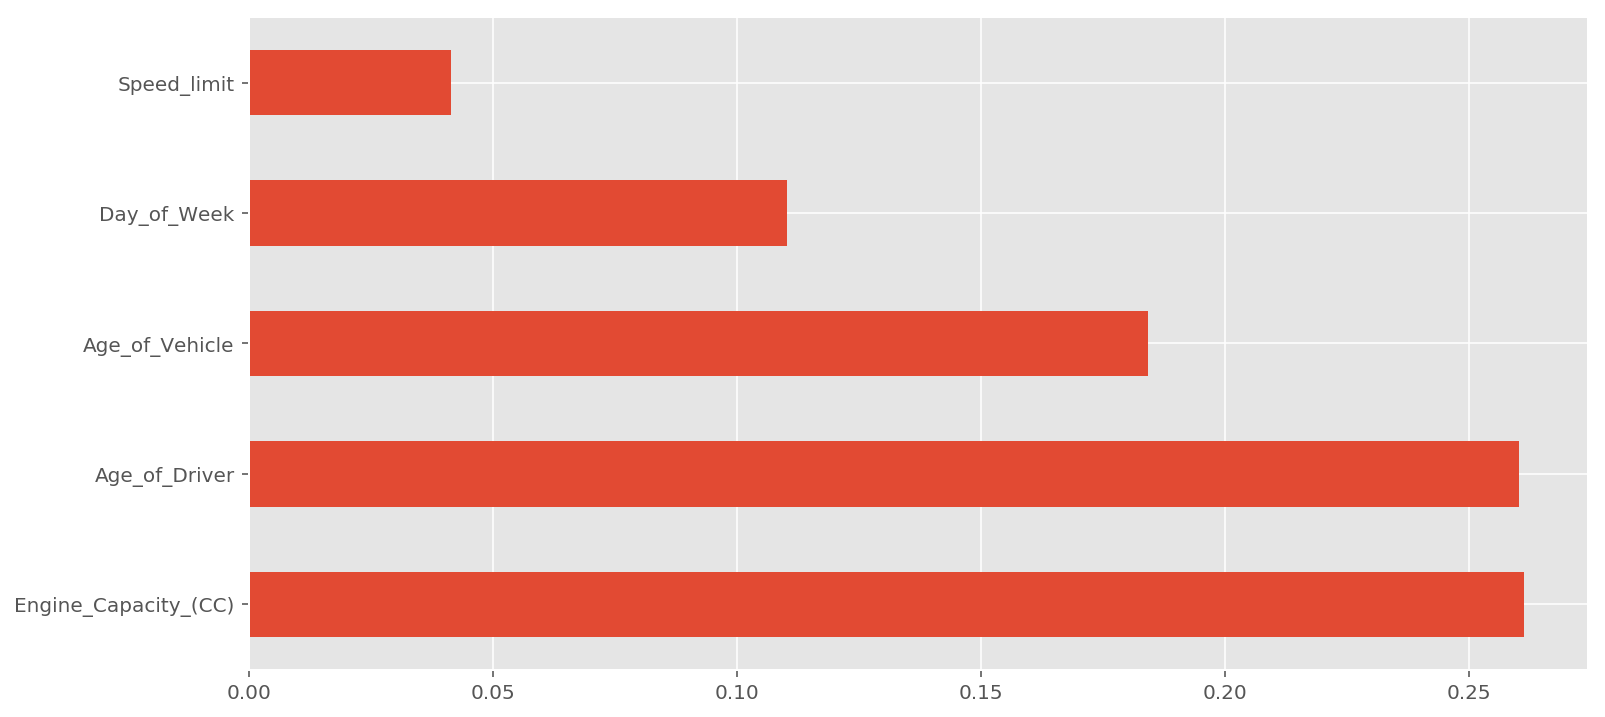

In [ ]:
plt.figure(figsize=(12,6))
feat_importances = pd.Series(random_forest.feature_importances_, index=accident_ml.columns)
feat_importances.nlargest(5).plot(kind='barh')

In [ ]:
Y_pred = grid_search.predict(X_test)
acc_random_forest1 = round(grid_search.score(X_test, y_test) * 100, 2)

sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=Y_pred)

print("Accuracy" , acc_random_forest1)
print(sk_report)

### Confusion Matrix 
pd.crosstab(y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Accuracy 83.7
              precision    recall  f1-score   support

           1   0.000000  0.000000  0.000000       343
           2   0.495833  0.028159  0.053292      4226
           3   0.839920  0.995799  0.911241     23326

   micro avg   0.836960  0.836960  0.836960     27895
   macro avg   0.445251  0.341319  0.321511     27895
weighted avg   0.777465  0.836960  0.770060     27895



Predicted,2,3,All
Actual,,,
1,23,320,343
2,119,4107,4226
3,98,23228,23326
All,240,27655,27895


**As we have implemented the Logistic Regression, Decision Tree and Random Forest algorithms to predict the accident severity. There are two things that we can conclude from this learning. As we have tried three different algorithms to predict the accident severity. It was clear that Decision tree and Random Forest performed much better in terms of predicting all the classes of accident severity. Logistic regression has better accuracy but it does not mean it did better than other algorithm. We even tried multi-nomial to predict all the classes in hyperparameter tuning section. It still predicted only one of the higher occuring class. There are two things that were clear from this project. First, the most of the accidents occured locally. Secondly, we used feature importance and vehicle engine and age of the driver are the biggest factor in accident severity. We already know that the car insurances are expensive for the young age people and this is one of the reasons. **

---



In [ ]:
!ipython nbconvert --to html Arup.ipynb 

[TerminalIPythonApp] WARNING | Subcommand `ipython nbconvert` is deprecated and will be removed in future versions.
[TerminalIPythonApp] WARNING | You likely want to use `jupyter nbconvert` in the future
[NbConvertApp] Converting notebook Arup.ipynb to html
[NbConvertApp] Writing 1963862 bytes to Arup.html
